In [1]:
import torch
import wandb
from hydra import compose, initialize

from src.evaluation.visual.visualize import visualize_np
from src.utils.helper import download_run
from src.utils.load_np import load_np
from src.evaluation.visual.vis_task import vis_task

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 

In [3]:
# project = "cluster-np"
# name = "1-mean-cnp-data-None-0" # "1-mean-lnp-data-1.0-0" # "1-mean-lnp-data-None-0" # "1-bca-lnp-data-None-0" #"1-mean-lnp-data-None-0" # "1-mean-cnp-context-None-0"

# dir = download_run(project, name)

dir = f"../models/lnp"

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    model, trainer, test_loader, _ = load_np(
        cfg=cfg, 
        device=device, 
        dir=dir, 
    ) 


Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 239791.60it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


model not found at ../models/lnp/model.pth
optim not found at ../models/lnp/optim.pth


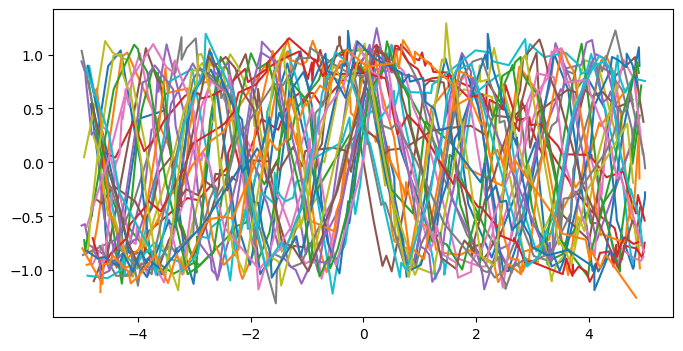

In [5]:
vis_task(test_loader)

In [ ]:
trainer.wandb_logging = False
if trainer.wandb_logging:
    wandb.init(project="np")

In [7]:
train = True
if train:
    num_epochs = 30
    losses = trainer.train(
        num_epochs=num_epochs,
        max_clip_norm=cfg.training.max_clip_norm,
        alpha=cfg.training.alpha,
        validate=True
    )
    # torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")

  0%|          | 0/1 [00:00<?, ?it/s]/home/chickencurry/dvi-for-bml/src/evaluation/predictive/pred_metrics.py:37: UserWarning: The operator 'aten::median' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  lmpl = torch.median(
100%|██████████| 32/32 [00:04<00:00,  6.68it/s, epoch=29, loss=112, lmpl=-116, mse=145]


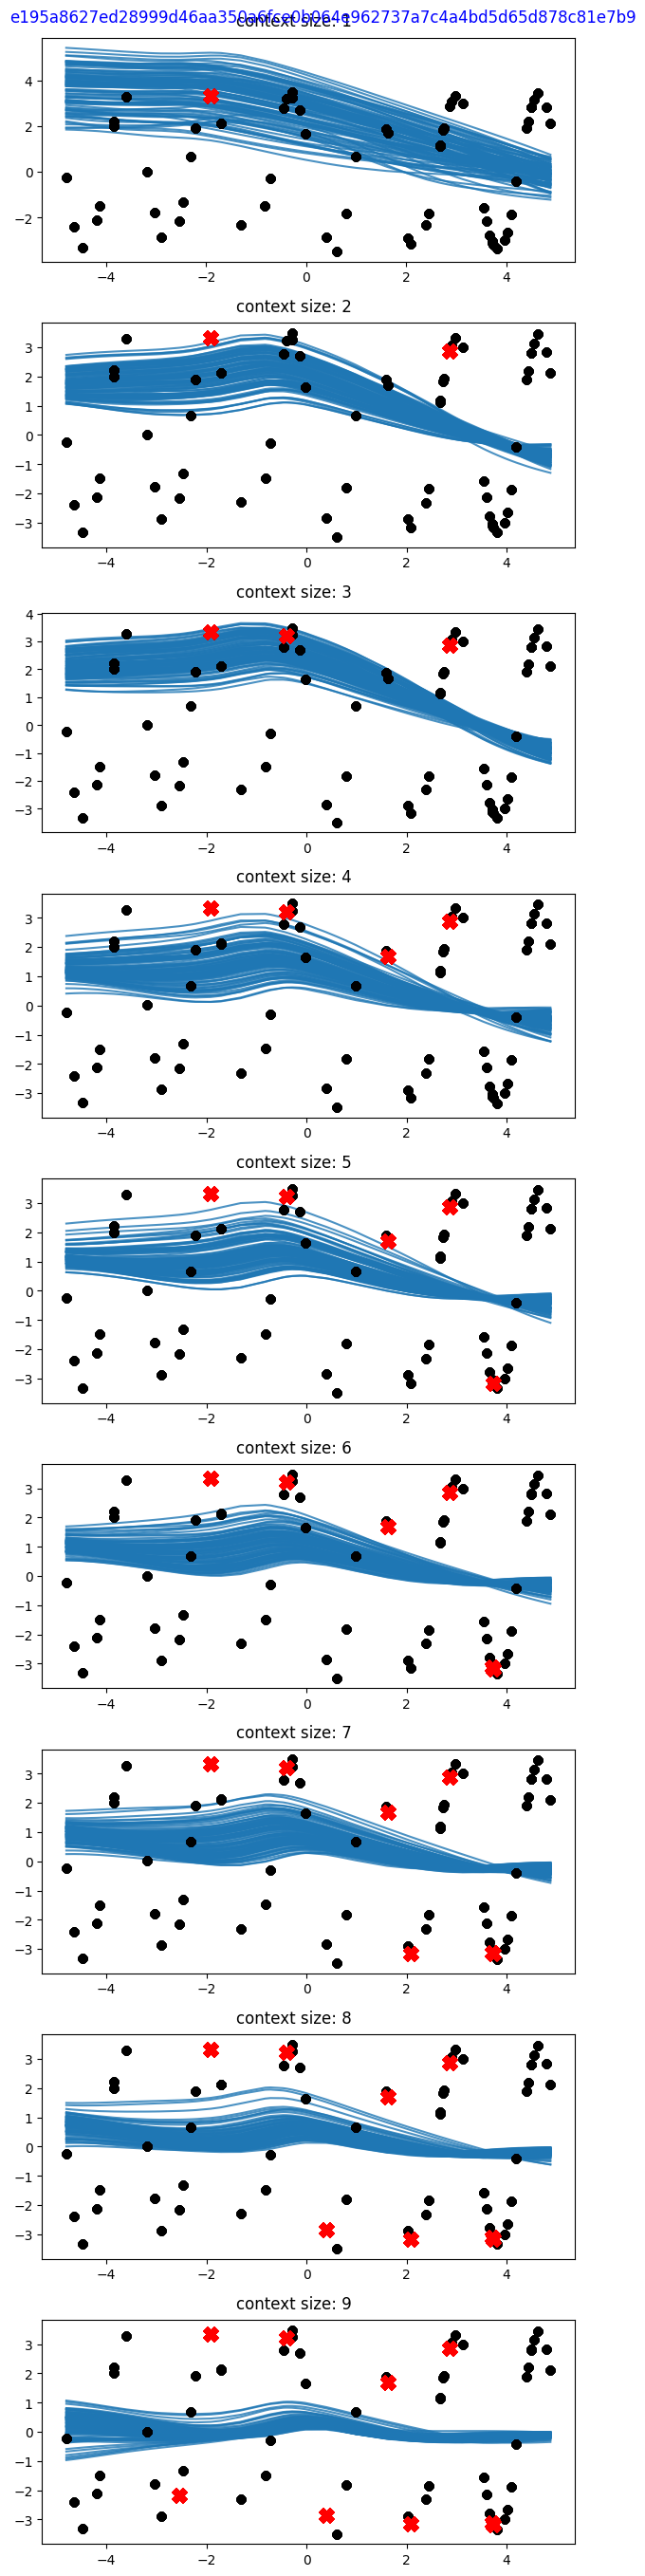

In [18]:
max_context_size = 9
num_samples = 100 # num_cells will be root

visualize_np(
    model=model,
    device=device,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    show_sigma=False
)